<img src="Banner.jpg">



# Abstract

We are studying the dataset **"Countries of the world"** which has the data about the GDP of 227 countries and factors affecting it.This dataset is compiled by the US government.
Aim of the project is to perform Exploratary data analysis to analyze the data and find the variables which affect the countries GDP the most.

The explanation of the data points given:

- Country: Names of countries
- Region: Region where the country belongs
- Population: Population of the country
- Area: Areas in sq metre
- Pop. Density: population density of the country given in per sq.m.
- Coatline: Coastline area (coast/area ratio)
- Net migration: number of immigrants - number of emmigrants
- Infant mortality: Infant mortality is the death of young children under the age of 1.It is calculated for per 1000 births
- GDP: Gross domestic product.Calculated $ per capita
- Literacy: Measure of literate people.Calculated as percentage
- Phones: Number of mobile users.Calculated as per 1000 users
- Arable: Land available which is suitable to grow crops.Calculated as percentage
- Crops: crops percentage
- Other: other factors considered.Calculated as percentage
- Climate: Climatic conditions
- Birthrate: Number of births per 1000 of the population
- Deathrate: Number of deaths per 1000 of the population
- Agriculture: Agriculture development rate
- industry: Industrial development rate
- Service: Other Service development rate






In [1]:
#importing needed libraries
%matplotlib inline 
import matplotlib.pyplot as plt #Visualisation
import numpy as np #Linear Algebra
import pandas as pd #Data processing
from scipy import stats #Numerical Routines
import seaborn as sns #Visualisation
import re
#Machine Learning Library
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
#import the dataset 
#Used read_csv function of pandas library to import the dataset and the decimal is used to mention the type of seperator
df = pd.read_csv("countries of the world.csv",decimal = ',')
df.head() #used .head() function of pandas library to show first 5 rows of the dataset

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [3]:
#used to show total number of rows and columns in dataset
df.shape

(227, 20)

In [4]:
#This function helps to get the details about the columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null float64
Birthrate       

In [5]:
df.describe() #shows mean, standard deviation and quartiles of the dataset ie the statistics 

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [6]:
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False)
# Look at top 20 countries having latgest value for GDP
top_gdp_countries[['GDP ($ per capita)','Country']].head(20)

,GDP ($ per capita),Country
121,55100.0,Luxembourg
154,37800.0,Norway
214,37800.0,United States
22,36000.0,Bermuda
38,35000.0,Cayman Islands
177,34600.0,San Marino
196,32700.0,Switzerland
54,31100.0,Denmark
93,30900.0,Iceland
12,30000.0,Austria


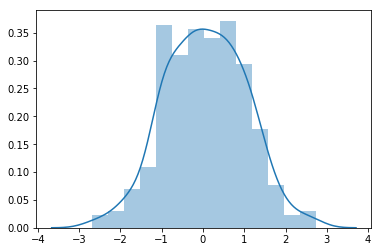

In [7]:
x = np.random.normal(size=333)
sns.distplot(x)
plt.show()

It is evident from the above histogram that the GDP data is normally distributed with 2 standard deviations from the mean.

# Handling missing values

In [8]:
#Made a copy of data before imputing any missing values.
da = df.copy()

In [9]:
#Calculated the missing values in all the columns of the dataset and its percentage representation
#Excluded the columns which no missing values
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])


,total_missing,percent
Climate,22,9.69
Literacy (%),18,7.93
Industry,16,7.05
Service,15,6.61
Agriculture,15,6.61
Deathrate,4,1.76
Phones (per 1000),4,1.76
Birthrate,3,1.32
Infant mortality (per 1000 births),3,1.32
Net migration,3,1.32


In [10]:
# Checking for null values in the whole dataset
da.isnull().any()

Country                               False
Region                                False
Population                            False
Area (sq. mi.)                        False
Pop. Density (per sq. mi.)            False
Coastline (coast/area ratio)          False
Net migration                          True
Infant mortality (per 1000 births)     True
GDP ($ per capita)                     True
Literacy (%)                           True
Phones (per 1000)                      True
Arable (%)                             True
Crops (%)                              True
Other (%)                              True
Climate                                True
Birthrate                              True
Deathrate                              True
Agriculture                            True
Industry                               True
Service                                True
dtype: bool

In [11]:
##Total No of missing values
da.isnull().sum().sum()

110

Replaced the null values 
Values of climate is replaced with its mode value
Other values replaced with median values

In [12]:
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        value = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        value = df.groupby('Region')[col].median()
    for region in df['Region'].unique():
        df[col].loc[(df[col].isnull())&(df['Region']==region)] = value[region]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

# Visualisations for Analysis of data


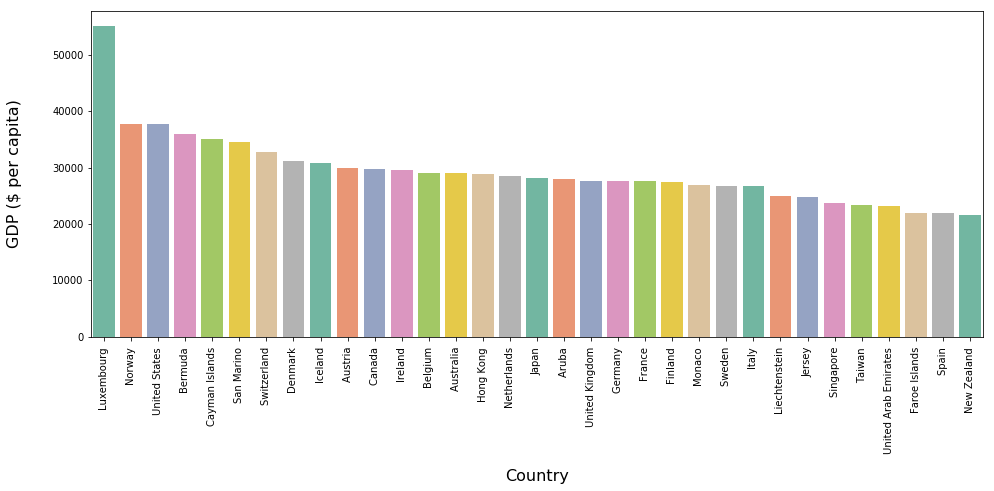

In [14]:
#Visualisation of the top 33 countries according to the GDP
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.head(33), palette='Set2')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

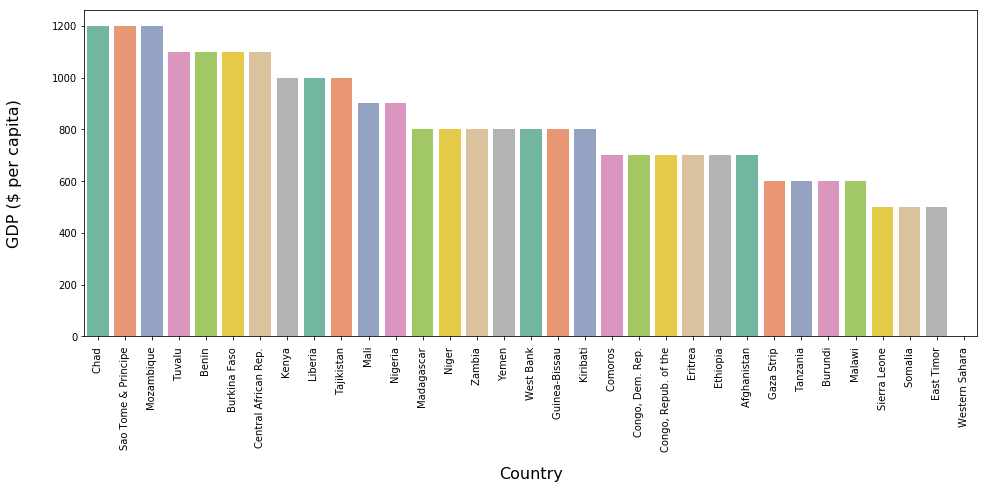

In [15]:
#Visualisation of the lowest 33 countries according to the GDP
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.tail(33), palette='Set2')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

In [16]:
#Calculated the median of GDP, Literacy, Agriculture According to the Region
df.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


In [17]:
np.random.seed(sum(map(ord, "distributions")))

In [18]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720


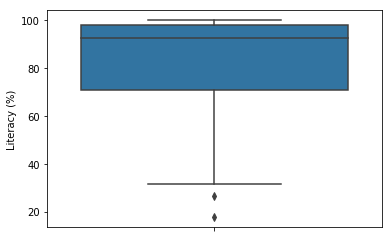

In [19]:
sns.boxplot(da['Literacy (%)'],orient="v")


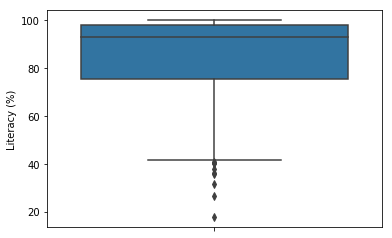

In [20]:
sns.boxplot(df['Literacy (%)'],orient="v")

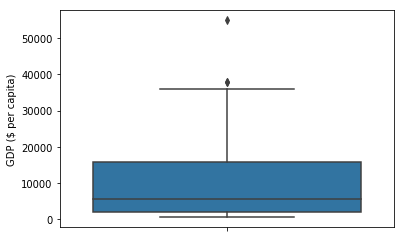

In [21]:
sns.boxplot(df['GDP ($ per capita)'],orient="v")

In [22]:
#Generating Corelation between the variables
df.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,0.000122,0.024488,-0.038915,-0.051610,-0.029235,0.188337,-0.059617,-0.121118,-0.024329,-0.044151,-0.025974,0.004867,0.105732,-0.087356
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.047537,-0.005120,0.072460,0.025954,0.055026,-0.079270,-0.142234,0.137956,0.031986,-0.064822,0.042418,-0.048821,0.127401,-0.057227
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.178088,-0.142741,0.196063,0.098487,0.280818,-0.080857,-0.032460,0.082066,0.061828,-0.157909,-0.067910,-0.110235,-0.116734,0.229223
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.133947,-0.138223,0.049561,0.133112,0.153204,-0.120760,0.338889,-0.078312,-0.006490,-0.074021,-0.162705,-0.036301,-0.214819,0.210201
Net migration,0.000122,0.047537,0.178088,-0.133947,1.000000,-0.024876,0.382029,-0.015620,0.239160,-0.059334,-0.344337,0.225740,0.027798,-0.064947,0.033575,-0.107105,-0.019156,0.110103
Infant mortality (per 1000 births),0.024488,-0.005120,-0.142741,-0.138223,-0.024876,1.000000,-0.595432,-0.758702,-0.666699,-0.113607,-0.070197,0.128063,-0.373921,0.844442,0.655891,0.706734,0.028859,-0.640007
GDP ($ per capita),-0.038915,0.072460,0.196063,0.049561,0.382029,-0.595432,1.000000,0.508839,0.832364,0.023937,-0.218093,0.093737,0.361704,-0.643199,-0.196322,-0.585987,-0.034993,0.553994
Literacy (%),-0.051610,0.025954,0.098487,0.133112,-0.015620,-0.758702,0.508839,1.000000,0.587440,0.085269,0.038372,-0.088522,0.425807,-0.776946,-0.376756,-0.594062,0.019528,0.505618
Phones (per 1000),-0.029235,0.055026,0.280818,0.153204,0.239160,-0.666699,0.832364,0.587440,1.000000,0.068853,-0.150700,0.022293,0.436692,-0.721099,-0.253033,-0.599405,-0.158178,0.670933
Arable (%),0.188337,-0.079270,-0.080857,-0.120760,-0.059334,-0.113607,0.023937,0.085269,0.068853,1.000000,0.094614,-0.856770,0.377806,-0.195100,0.060153,-0.023227,-0.048444,0.066550


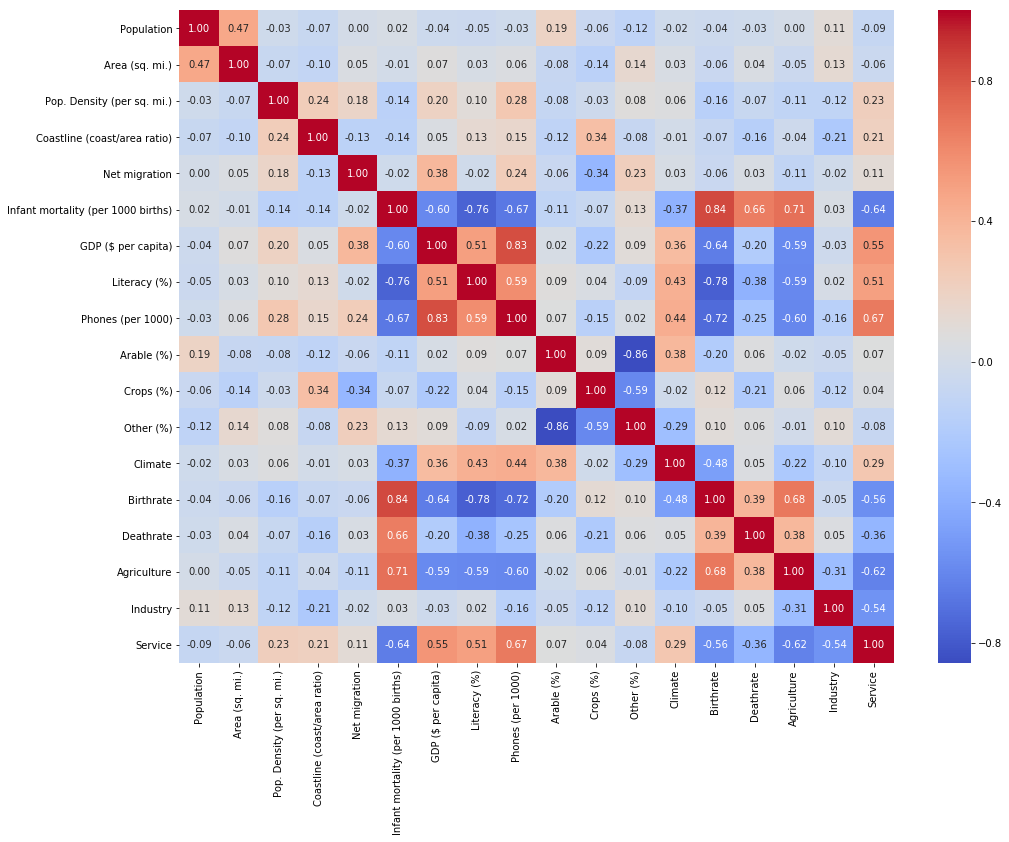

In [23]:
#Generated Heatmap to show correlation in visualisation
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [24]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Service','Infant mortality (per 1000 births)','Climate','Net migration']]

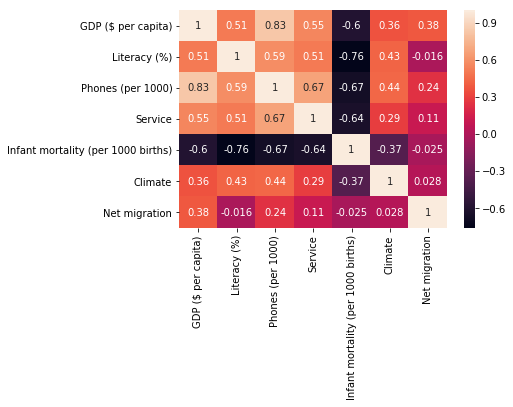

In [25]:
# show corr of the same
sns.heatmap(x.corr(), annot=True)

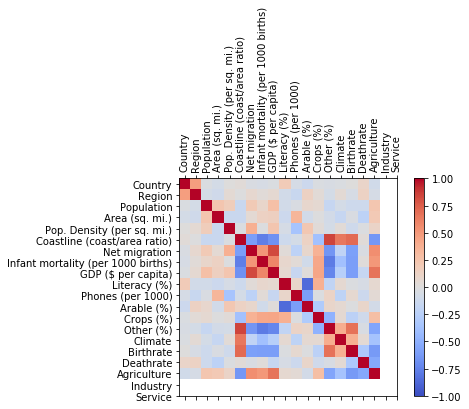

In [26]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

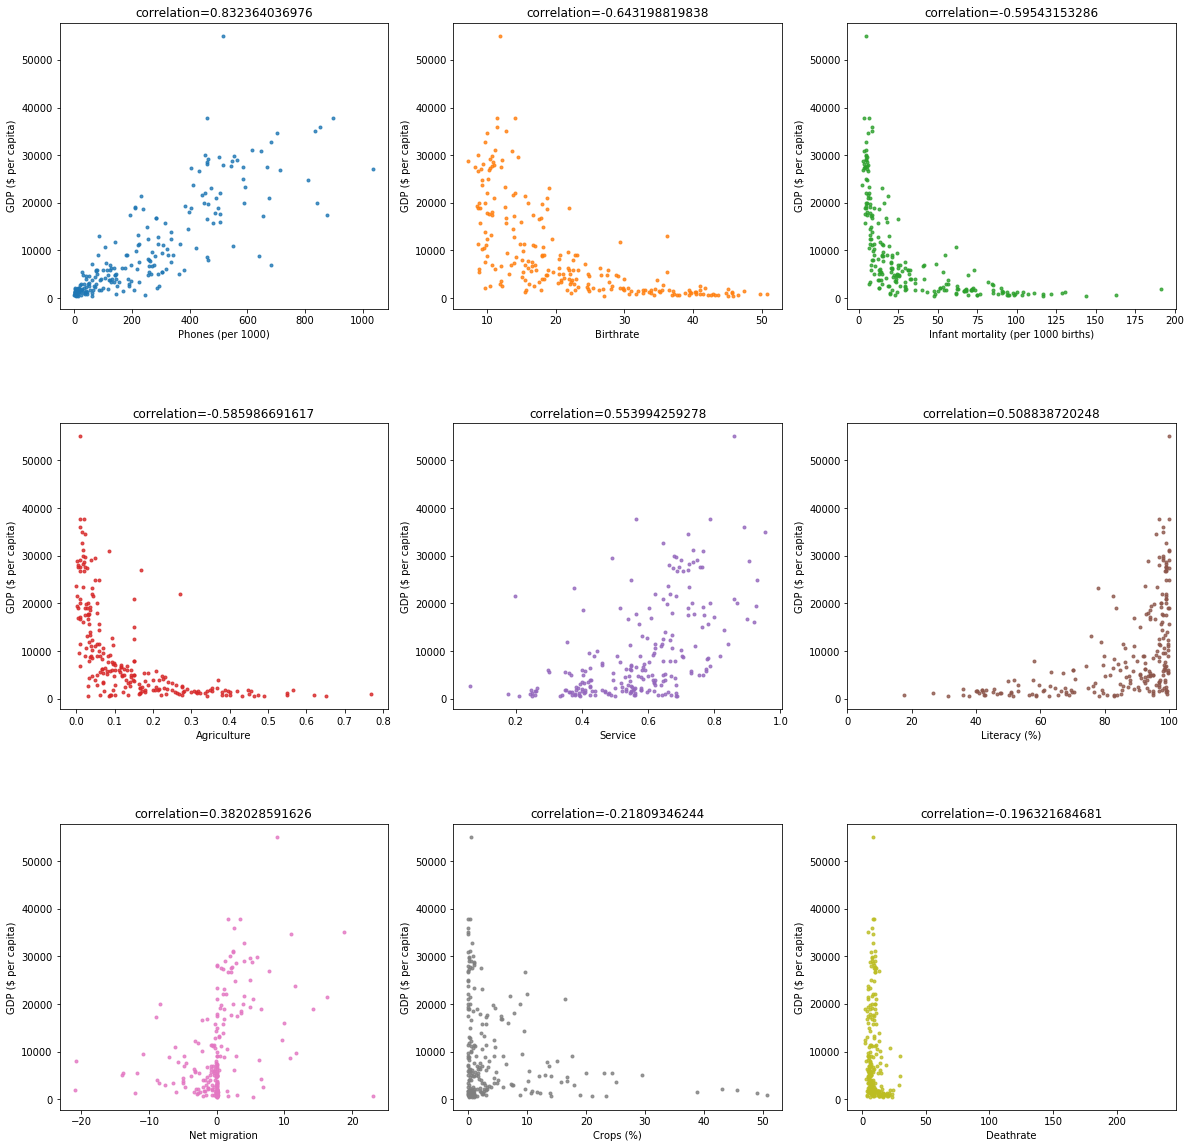

In [27]:
#Defining correlation using scatterplot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = df['GDP ($ per capita)'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [28]:
df.groupby('Region')[['GDP ($ per capita)', 'Phones (per 1000)', 'Service']].median()

,GDP ($ per capita),Phones (per 1000),Service
Region,,,
ASIA (EX. NEAR EAST),3450.0,61.50,0.4950
BALTICS,11400.0,321.40,0.6660
C.W. OF IND. STATES,3450.0,155.35,0.4595
EASTERN EUROPE,9100.0,296.05,0.5910
LATIN AMER. & CARIB,6300.0,222.85,0.6180
NEAR EAST,9250.0,211.00,0.5840
NORTHERN AFRICA,6000.0,123.60,0.4255
NORTHERN AMERICA,29800.0,683.20,0.7870
OCEANIA,5000.0,118.60,0.6440


In [29]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Phones (per 1000)','Service']]

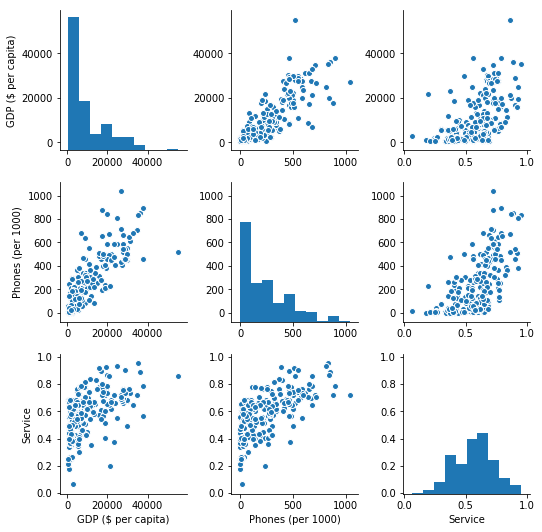

In [30]:
#sns.pairplot(x, hue="GDP ($ per capita)")
sns.pairplot(x)

In [31]:
x.corr()

,GDP ($ per capita),Phones (per 1000),Service
GDP ($ per capita),1.000000,0.832364,0.553994
Phones (per 1000),0.832364,1.000000,0.670933
Service,0.553994,0.670933,1.000000


In [32]:
#Calculate skewness and kutosis
#The grapg is left skewed and is platykurtic
print("Skewness: %f" % df['GDP ($ per capita)'].skew())
print("Kurtosis: %f" % df['GDP ($ per capita)'].kurt())

Skewness: 1.382374
Kurtosis: 1.577273


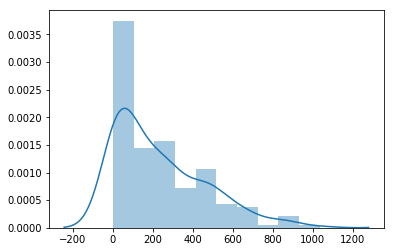

In [34]:
#checking distribution of Phones (per 1000) of the world
sns.distplot(np.array(df['Phones (per 1000)'].astype(int)))

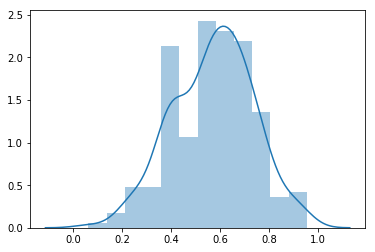

In [35]:
#checking distribution of Service of the world
sns.distplot(np.array(df['Service']))

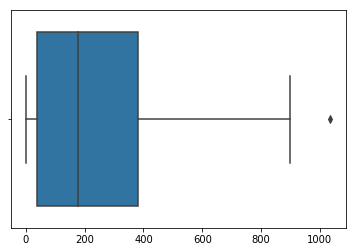

In [36]:
sns.boxplot(np.array(df['Phones (per 1000)']))

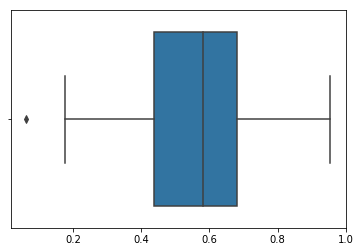

In [37]:
#Boxplot of Service
sns.boxplot(np.array(df['Service']))

I selected the following variables as 

# Predictors(independent variables):

Population

Literacy (%)

Phones (per 1000)

Area (sq. mi.)

Climate

# Predict variable:

GDP ($ per capita)

In [57]:
x = df[['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Area (sq. mi.)','Climate','Population']]
x

,GDP ($ per capita),Literacy (%),Phones (per 1000),Area (sq. mi.),Climate,Population
0,700.0,36.00,3.2,647500,1.0,31056997
1,4500.0,86.50,71.2,28748,3.0,3581655
2,6000.0,70.00,78.1,2381740,1.0,32930091
3,8000.0,97.00,259.5,199,2.0,57794
4,19000.0,100.00,497.2,468,3.0,71201
5,1900.0,42.00,7.8,1246700,2.0,12127071
6,8600.0,95.00,460.0,102,2.0,13477
7,11000.0,89.00,549.9,443,2.0,69108
8,11200.0,97.10,220.4,2766890,3.0,39921833
9,3500.0,98.60,195.7,29800,4.0,2976372


In [58]:
x.rename(columns={'GDP ($ per capita)':'GDP'}, inplace=True)
print(x.columns)

Index(['GDP', 'Literacy (%)', 'Phones (per 1000)', 'Area (sq. mi.)', 'Climate',
       'Population'],
      dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [60]:
from sklearn.linear_model import LinearRegression
X = x.drop(['GDP'], axis=1)
regressor = LinearRegression()
regressor.fit(X, x.GDP)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
print('Estimated intercept coefficient:', regressor.intercept_)

Estimated intercept coefficient: 68.6752912371


In [62]:
print('Number of coefficients:', len(regressor.coef_))

Number of coefficients: 5


In [63]:
pd.DataFrame(list(zip(X.columns, regressor.coef_)), columns = ['features', 'est_coef'])

,features,est_coef
0,Literacy (%),16.349893
1,Phones (per 1000),36.095761
2,Area (sq. mi.),0.000241
3,Climate,-133.599521
4,Population,-0.000003


# The most dominating variable to predict “GDP” is the Phones variable.

Correlation Scatter Plot

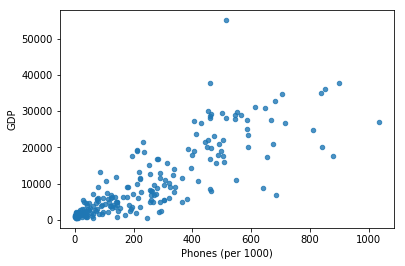

In [65]:
x.plot(kind="scatter", x="Phones (per 1000)", y="GDP",
             alpha=0.8)
plt.savefig('scatter_plot.png')

The correlation is very strong. There upward trend and that the points are not too dispersed.

# Split the data into training set and test set.

In [67]:
from sklearn.cross_validation import train_test_split
y = x.GDP
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Building a linear regression model

In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
y_pred = regressor.predict(X_test)
regressor.score(X_test, y_test)

0.57874916392302478

The model is 57.87% of the variability in Y can be explained using X.

# Calculate root mean square error (RMSE)

In [73]:
from sklearn.metrics import mean_squared_error
regressor_mse = mean_squared_error(y_pred, y_test)
import math
math.sqrt(regressor_mse)

5584.672043770429

RMSE of 5584.6 means that the model predicted an average of 5584.62 away from the true value while making predictions on the test data set. This is an under fitted model which means that the features does not provide enough information to make good predictions.

# Conclusion

In this assignment, I explored countries of the world dataset. My goal was to predict a country’s GDP by selected features.

I used Sklearn to fit linear regression to the entire dataset and calculated the coefficients.
# Estimated intercept coefficient: 68.6752912371
# Number of Coefficients: 5

I split the data into training and test sets and calculated R squared and RMSE on the test set.
# Root Mean Square Error: 5584.67

To obtain a better RMSE score, I could try to add more features, or try another model such as Random Forest or Decision Tree.

# Contribution

- By own: 30%
- By external source:70%

# Citation


- https://www.kaggle.com/stieranka/predicting-gdp-world-countries
- https://towardsdatascience.com/how-business-friendly-is-your-country-linear-regression-in-python-c22ff0fcebdd

# License

Copyright 2019  **Apurva Nivargi**

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.